# Week 6 Exercises: Statistics for Data Science

In [1]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as stats
import statsmodels.formula.api as sm

### Question 1: Sea Level Rise

The file key_west.csv contains Mean Sea Level values monthly for Key West, Florida.
Use this data to fit a linear regression model with target value the Monthly_MSL column and predictor variable the Year.

In [2]:
key_west = pd.read_csv("../data/key_west.csv")
key_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1302 non-null   int64  
 1   Month        1302 non-null   int64  
 2   Monthly_MSL  1302 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 30.6 KB


In [3]:
# CREATE A LINEAR REGRESSION MODEL
msl_lr = sm.ols(formula="Monthly_MSL ~ Year",
            data=key_west).fit()

msl_lr.params

Intercept   -5.042668
Year         0.002536
dtype: float64

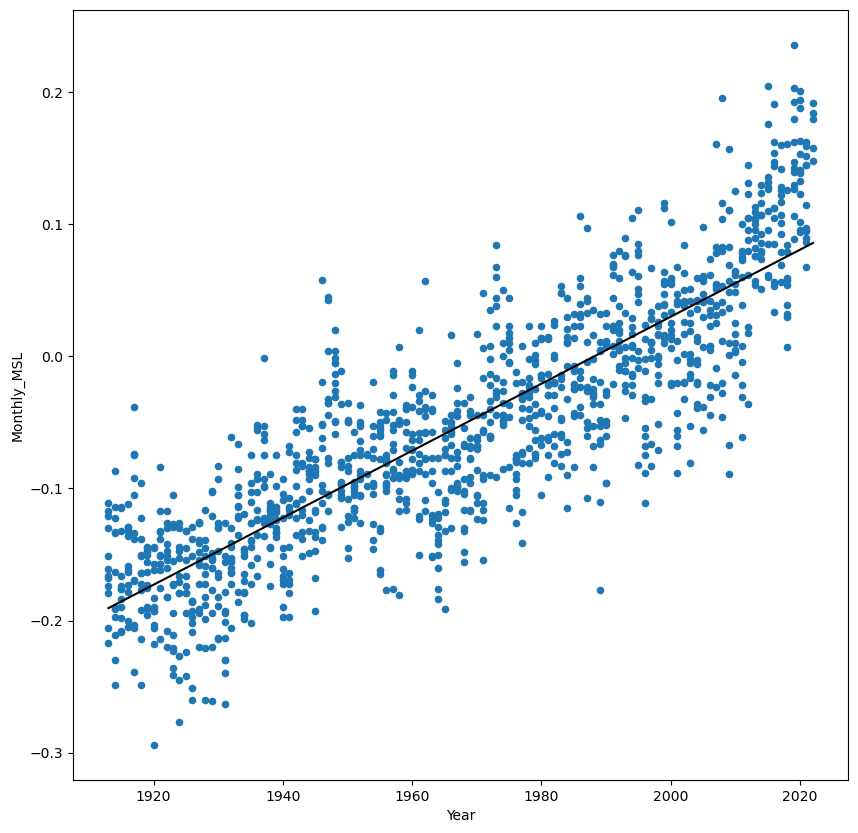

In [4]:
# CREATE A SCATTER PLOT
x_pred = pd.DataFrame({
    "Year": np.linspace(start=key_west['Year'].min(),
                        stop=key_west['Year'].max(),
                        num=250)
                      })

pred = msl_lr.predict(x_pred)

key_west.plot(kind="scatter",
              x="Year",
              y="Monthly_MSL",
              figsize=(10,10))

plt.plot(x_pred['Year'], pred, color='black');

a. What coefficient do you obain for the Year variable? Is it statistically significant?

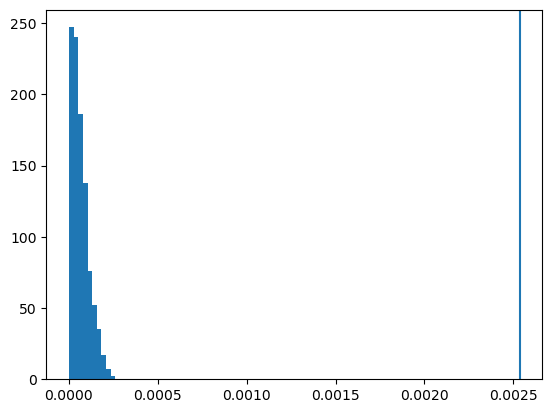

In [5]:
# GET PERMUTATIONS W/O REPLACEMENT
num_permutations = 1000
key_west_copy = key_west.copy(deep=True)
msl_permutation_slopes = []

for _ in range(num_permutations):
    key_west_copy['Year'] = np.random.choice(key_west_copy['Year'],
                                             len(key_west_copy),
                                             replace=False)

    msl_lr_permute = sm.ols(formula="Monthly_MSL ~ Year",
                        data=key_west_copy).fit()

    msl_permutation_slopes.append(msl_lr_permute.params['Year'])

# CREATE A HISTOGRAM
plt.hist(np.abs(msl_permutation_slopes))
ymin, ymax = plt.ylim()
plt.vlines(np.abs(msl_lr.params['Year']),
           ymin,
           ymax)
plt.ylim(ymin, ymax);
           

In [6]:
print(f"YEAR COEFFICIENT: {msl_lr.params['Year']}")
print(f"YEAR P-VALUE: {msl_lr.pvalues.Year}")

YEAR COEFFICIENT: 0.002536369324661952
YEAR P-VALUE: 0.0


**ANSWER: THE YEAR COEFFICIENT OF 0.002 IS STATISTICALLY SIGNIFICANT**

b. How can we interpret the meaning of this coefficient?

**ANSWER: FOR EACH YEAR, THE AVERAGE MONTHLY MSL INCREASES BY 0.002**

### Question 2: Penguins

For these questions, you'll be working with the penguins dataset.

In [7]:
penguins = pd.read_csv("../data/penguins.csv")

a. Fit a linear regression model with target variable body_mass_g and predictor flipper_length_mm. 

In [8]:
body_mass_lr = sm.ols(formula="body_mass_g ~ flipper_length_mm",
                      data=penguins).fit()

body_mass_lr.params

Intercept           -5780.831358
flipper_length_mm      49.685566
dtype: float64

Interpret the meaning of the coefficients you get. 

**ANSWER: FOR EACH MM IN FLIPPER LENGTH, THE AVERAGE BODY MASS WILL INCREASE BY 49.686 G**

What does the model estimate the average body_mass_g will be for a penguin with flipper length of 190 mm? 

In [9]:
print(f"PREDICTED AVG BODY MASS WITH FLIPPER LENGTH 190 MM: {(body_mass_lr.params.Intercept + body_mass_lr.params.flipper_length_mm * 190).round(3)} g")

PREDICTED AVG BODY MASS WITH FLIPPER LENGTH 190 MM: 3659.426 g


Create a prediction interval for a flipper length of 190 mm and interpret the meaning of this interval.

In [10]:
body_mass_x_pred = pd.DataFrame({
    "flipper_length_mm": [190]
})

body_mass_lr_pred = body_mass_lr.get_prediction(body_mass_x_pred).summary_frame()
body_mass_lr_pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3659.426259,27.004347,3606.309633,3712.542885,2882.077728,4436.77479


**ANSWER: FOR A FLIPPER LENGTH OF 190 MM, THE AVG OBSERVED BODY MASS WILL BE 2882.078 - 4436.775**

b. Check whether the coefficients you got in part a are statistically significant.

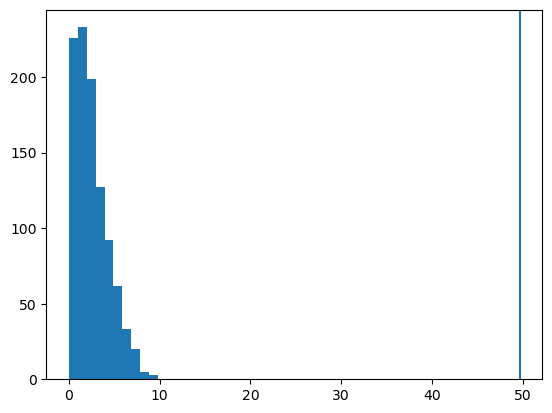

In [11]:
# GET PERMUTATIONS W/O REPLACEMENT
num_permutations = 1000
penguins_copy = penguins.copy(deep=True)
body_mass_permutation_slopes = []

for _ in range(num_permutations):
    penguins_copy['flipper_length_mm'] = np.random.choice(penguins_copy['flipper_length_mm'],
                                                          len(penguins_copy),
                                                          replace=False)

    body_mass_lr_permute = sm.ols(formula="body_mass_g ~ flipper_length_mm",
                                  data=penguins_copy).fit()

    body_mass_permutation_slopes.append(body_mass_lr_permute.params['flipper_length_mm'])

# CREATE A HISTOGRAM
plt.hist(np.abs(body_mass_permutation_slopes))
ymin, ymax = plt.ylim()
plt.vlines(np.abs(body_mass_lr.params['flipper_length_mm']),
           ymin,
           ymax)
plt.ylim(ymin, ymax);
           

**ANSWER: THE FLIPPER COEFFICIENT OF 49.685 IS STATISTICALLY SIGNIFICANT**

c. Fit a model with target variable body_mass_g and predictor variable sex. Interpret the meaning of the coefficients you get.

In [12]:
penguins.groupby('sex')['body_mass_g'].mean()

sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

In [13]:
boday_mass_lr = sm.ols(formula="body_mass_g ~ sex",
            data=penguins).fit()

boday_mass_lr.params

Intercept      3862.272727
sex[T.male]     683.411797
dtype: float64

**ANSWER:**
<br>
**THE FEMALE PREDICTOR INDICATOR = 0**
<br>
**THE AVG BODY MASS OF A FEMALE = 3862.272 + 683.412 * 0**
<br>
**THE MALE PREDICTOR INDICATOR = 1**
<br>
**THE AVG BODY MASS OF A MALE = 3862.272 + 683.412 * 1**

d. Fit a model with target variable body_mass_g and predictor variable species. Interpret the meaning of the coefficients you get.

In [14]:
boday_mass_lr = sm.ols(formula="body_mass_g ~ species",
                       data=penguins).fit()

boday_mass_lr.params

Intercept               3700.662252
species[T.Chinstrap]      32.425984
species[T.Gentoo]       1375.354009
dtype: float64

**ANSWER:**
<br>
**THE ADELIE PREDICTOR INDICATOR = 0**
<br>
**THE AVG BODY MASS OF AN ADELIE = 3700.662 + 0 * 0**
<br>
<br>
**THE CHINSTRAP PREDICTOR INDICATOR = 1**
<br>
**THE AVG BODY MASS OF A CHINSTRAP = 3700.662 + 32.426 * 1**
<br>
<br>
**THE GENTOO PREDICTOR INDICATOR = 2**
<br>
**THE AVG BODY MASS OF A GENTOO = 3700.662 + 1375.354 * 2**

### Question 3: King County Home Prices
The file kc_sample.csv contains a sample of 1000 homes that were sold in King County, Washington. 

In [15]:
kc_sample = pd.read_csv("../data/kc_sample.csv")
kc_sample.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8562790980,20150303T000000,713000.0,3,2.75,2310,1850,2.0,0,0,...,10,2020,290,2011,0,98027,47.5304,-122.073,2340,2155
1,5127000810,20140514T000000,305495.0,3,1.75,2110,10200,2.0,0,0,...,7,2110,0,1966,0,98059,47.4744,-122.154,1800,10200
2,3220079017,20150213T000000,432000.0,5,2.75,2060,329903,1.5,0,3,...,7,2060,0,1989,0,98022,47.1776,-121.944,2240,220232
3,2621750350,20150326T000000,358500.0,3,2.50,2000,8057,1.0,0,0,...,8,1360,640,1998,0,98042,47.3724,-122.107,2530,8964
4,2154900040,20141030T000000,194250.0,3,2.25,2190,8834,1.0,0,0,...,7,1390,800,1987,0,98001,47.2633,-122.244,1490,8766


Build a linear regression model with target variable `price` and predictor variable `sqft_living`.

In [16]:
price_lr = sm.ols(formula="price ~ sqft_living",
                  data=kc_sample).fit()

price_lr.params

Intercept     -55591.883139
sqft_living      280.011612
dtype: float64

How well does this model perform? Plot confidence intervals and prediction intervals against your dataset.

In [17]:
price_x_pred = pd.DataFrame({
    "sqft_living": np.linspace(start=kc_sample['sqft_living'].min(),
                               stop=kc_sample['sqft_living'].max(),
                               num = 250)
})

price_pred = price_lr.get_prediction(price_x_pred).summary_frame()

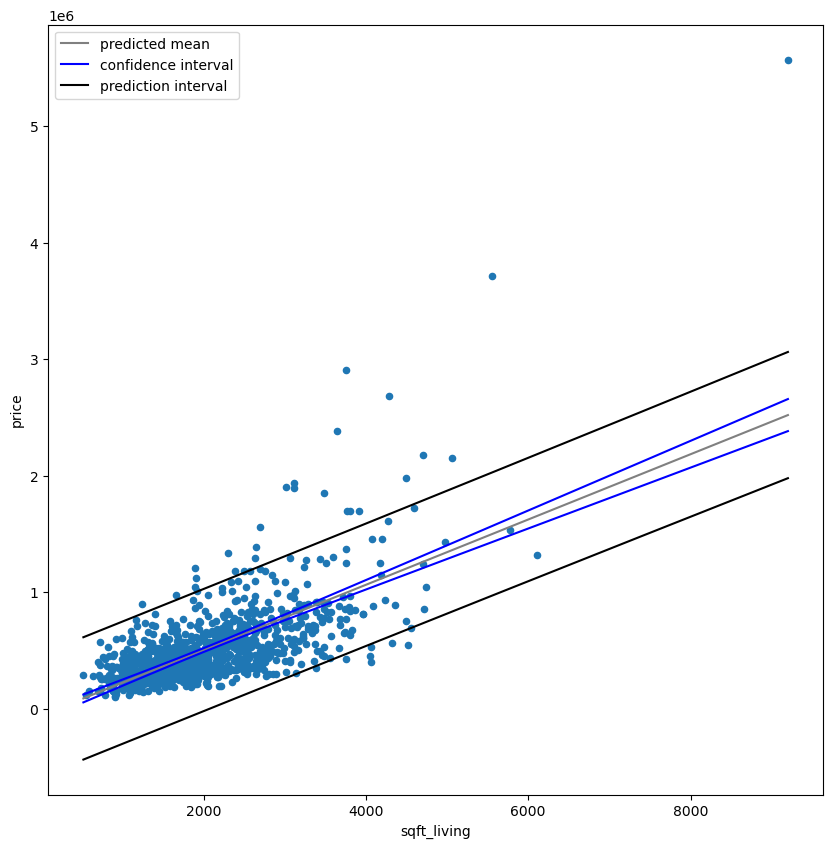

In [18]:
kc_sample.plot(kind="scatter",
               x="sqft_living",
               y="price",
               figsize=(10,10))

plt.plot(price_x_pred['sqft_living'], price_pred['mean'], color = 'grey', label = 'predicted mean')

plt.plot(price_x_pred['sqft_living'], price_pred['mean_ci_lower'], color = 'blue', label = 'confidence interval')
plt.plot(price_x_pred['sqft_living'], price_pred['mean_ci_upper'], color = 'blue')

plt.plot(price_x_pred['sqft_living'], price_pred['obs_ci_lower'], color = 'black', label = 'prediction interval')
plt.plot(price_x_pred['sqft_living'], price_pred['obs_ci_upper'], color = 'black')

plt.legend();

 Check the residuals. What problems might be present in this model?

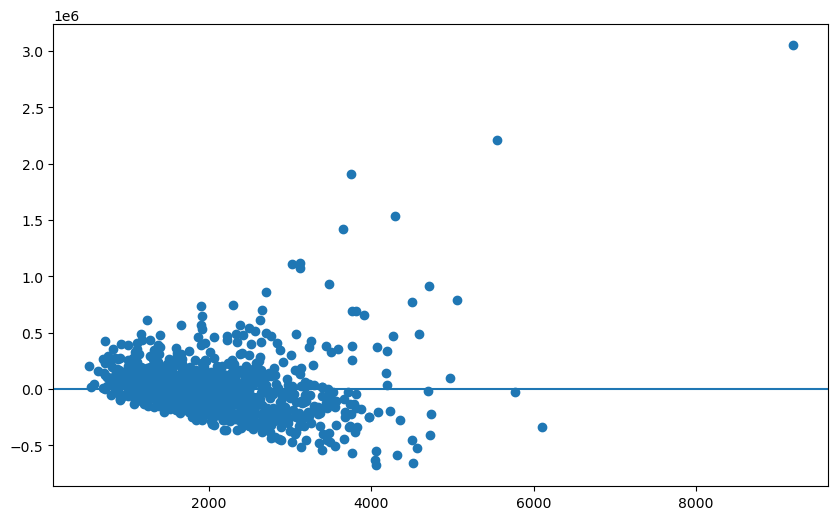

In [19]:
plt.figure(figsize = (10,6))
plt.scatter(kc_sample['sqft_living'], price_lr.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax)
plt.xlim(xmin, xmax);

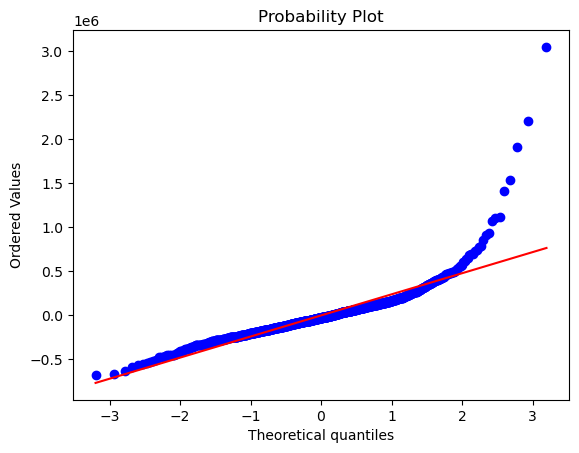

In [20]:
probplot(price_lr.resid, plot=plt);

**ANSWER: POSSIBLY NEEDS TO USE POLYNOMIAL REGRESSION**

**CORRECT ANSWER: POSSIBLY USE LOG OF PRICE, BUT JUST A CAUTIONARY TALE**